In [0]:
from numpy import asarray
from PIL import Image

### Polecenie
Każdy piksel obrazu RGB zawiera po jednej wartośći dla każdego z 3 kanałów R(red), G(green) i B (blue). Korzystając z gurpowania meotdą k-średnich, możemy podzielić wszystkie piksele danego obrazu na k klastrów i każdemu pikselowi przypisać kolor reprezentowany przez najbliższego centroida (tj. współrzędne środka cieżkości, do którego dany piksel został przydzielony). Dzięki temu działaniu obraz składający się z milionów kolorów może zostać skompresowany do obrazu zawierającego jedynie k kolorów. 



* Wczytaj obraz moko_01.jpg za pomocą bibloteki PIL i potraktuj każdy piksel jako pojedyńczy punkt o 3 wymiarach


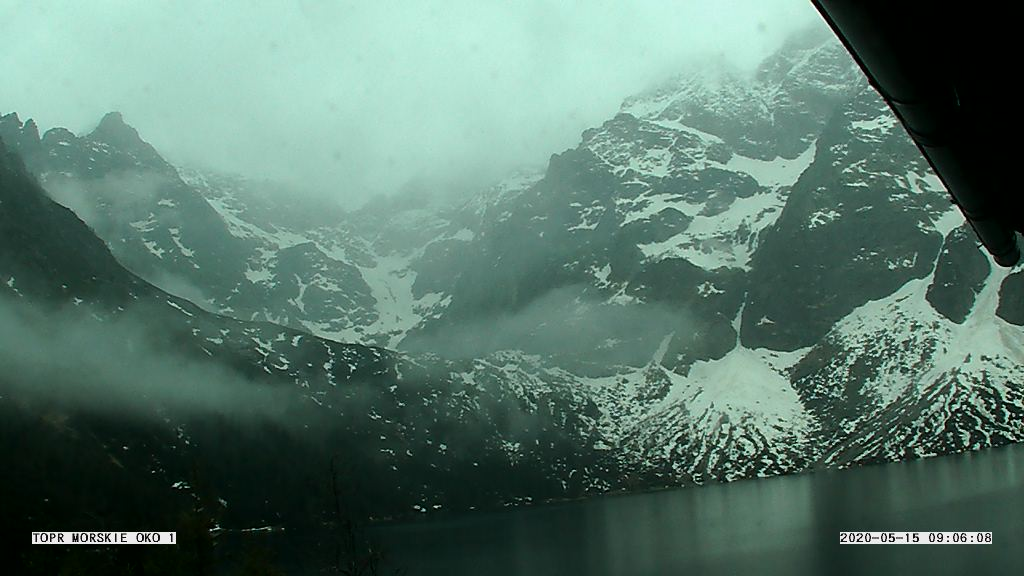

In [21]:
from IPython.display import Image 
pil_img = Image(filename='moko_01.jpg')
display(pil_img)

In [0]:
image = Image.open('moko_01.jpg')
arr_pix = asarray(image)

In [0]:
pixels = []
for row in arr_pix:
    for pixel in row:
        pixels.append(pixel)

pixels = np.asarray(pixels)

Dokonaj klastetyzacji metodą k-średnich i wybierz do ostatecznego podziału jako liczbę k najmniejszą z liczb. 


In [0]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=15, init='k-means++', random_state=1)
fitted = kmean.fit(pixels)

Każda współrzedną wszystkich uzyskanych centroidów zaokrąglić do najbliższej liczby całkowitej.

In [0]:
labels = fitted.predict(pixels)
centriods = fitted.cluster_centers_
centriods = np.around(centriods).astype(np.uint)

res = centriods[labels]


Dla grupowania na tak ustalone k klastrów dokonać przypisania każdemu pikselowi jego zaokrąglonej wartości środka ciężkości. 

In [0]:
img_arr_pix = np.reshape(res, (576, 1024, 3))
img_arr_pix = np.around(img_arr_pix).astype(np.uint8)

In [0]:
img_out = Image.fromarray(img_arr_pix)
img_out.save("moko_test.jpg")

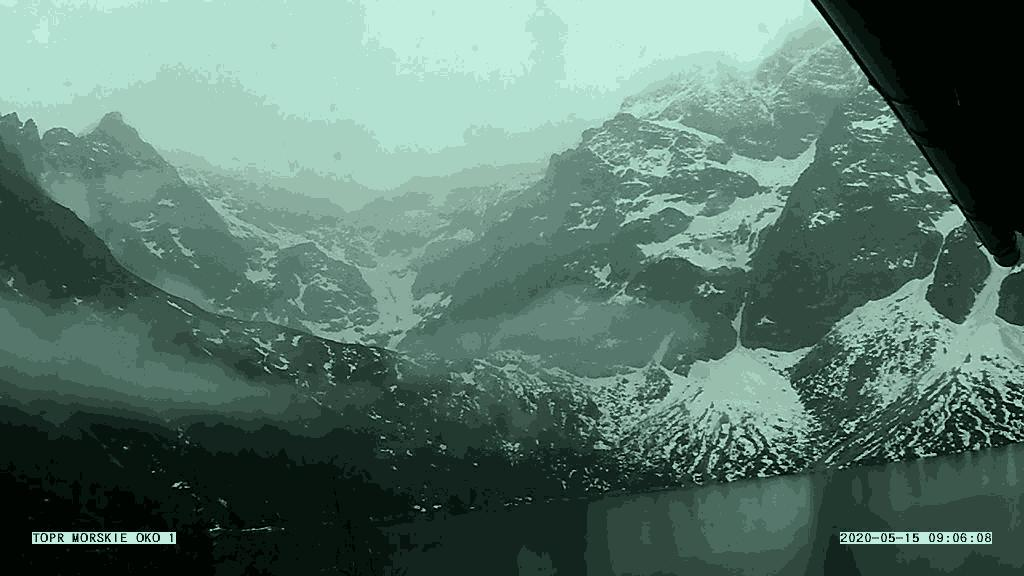

In [51]:
from IPython.display import Image 
pil_img = Image(filename='moko_test.jpg')
display(pil_img)